In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

In [2]:
master_tax = pd.read_csv('../data/master_tax.csv')

In [3]:
master_tax

,Unnamed: 0,Subject_ID,Visit_number,Visit_ID,Age,Sex,Diagnosis,Race,g__Abiotrophia,g__Acidaminococcaceae_unclassified,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,0,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,8698,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8699,8699,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8700,8700,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8701,8701,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
master_tax.columns

Index(['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Visit_ID', 'Age', 'Sex',
       'Diagnosis', 'Race', 'g__Abiotrophia',
       'g__Acidaminococcaceae_unclassified',
       ...
       'g__Sutterella', 'g__Sutterellaceae_unclassified', 'g__Synergistes',
       'g__T4likevirus', 'g__Tunalikevirus', 'g__Turicibacter',
       'g__Varibaculum', 'g__Veillonella', 'g__Weissella',
       'g__Wohlfahrtiimonas'],
      dtype='object', length=158)

In [6]:
master_tax.rename(columns={'Unnamed: 0': 'id'})

,id,Subject_ID,Visit_number,Visit_ID,Age,Sex,Diagnosis,Race,g__Abiotrophia,g__Acidaminococcaceae_unclassified,...,g__Sutterella,g__Sutterellaceae_unclassified,g__Synergistes,g__T4likevirus,g__Tunalikevirus,g__Turicibacter,g__Varibaculum,g__Veillonella,g__Weissella,g__Wohlfahrtiimonas
0,0,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,3001,15,CSM5MCXD,43,Female,CD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,8698,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8699,8699,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8700,8700,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8701,8701,3022,30,CSMAHYLR,69,Male,nonIBD,White,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
y = master_tax['Subject_ID']
Xs = master_tax.drop(columns=['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Visit_ID', 'Sex', 'Age', 'Diagnosis', 'Race'])

In [20]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xs, y)

RandomForestClassifier(n_estimators=1000)

In [21]:
rf.feature_importances_

array([0.00021994, 0.00300216, 0.00554829, 0.00011607, 0.00260555,
       0.00078725, 0.0037648 , 0.0001177 , 0.00123279, 0.01259932,
       0.02610784, 0.00034081, 0.00068838, 0.000698  , 0.00023154,
       0.02137986, 0.01579675, 0.0001152 , 0.00921608, 0.03404751,
       0.01048338, 0.02523245, 0.01836736, 0.03383856, 0.00011378,
       0.00023429, 0.00011279, 0.01544037, 0.0020894 , 0.00068915,
       0.00230891, 0.00837127, 0.00112339, 0.000923  , 0.00080038,
       0.00023064, 0.00011597, 0.00274467, 0.00753175, 0.00035309,
       0.01490396, 0.03058752, 0.02069544, 0.01000172, 0.00378306,
       0.01912385, 0.00056946, 0.0002286 , 0.00011201, 0.00021899,
       0.00034295, 0.00508028, 0.01568017, 0.02965837, 0.00148702,
       0.00796118, 0.00010587, 0.00263883, 0.00033987, 0.0010376 ,
       0.00011671, 0.00012355, 0.0153711 , 0.02505859, 0.03144626,
       0.03326438, 0.02241599, 0.00225728, 0.0001176 , 0.00116024,
       0.00011162, 0.00068983, 0.00252596, 0.00045454, 0.00056

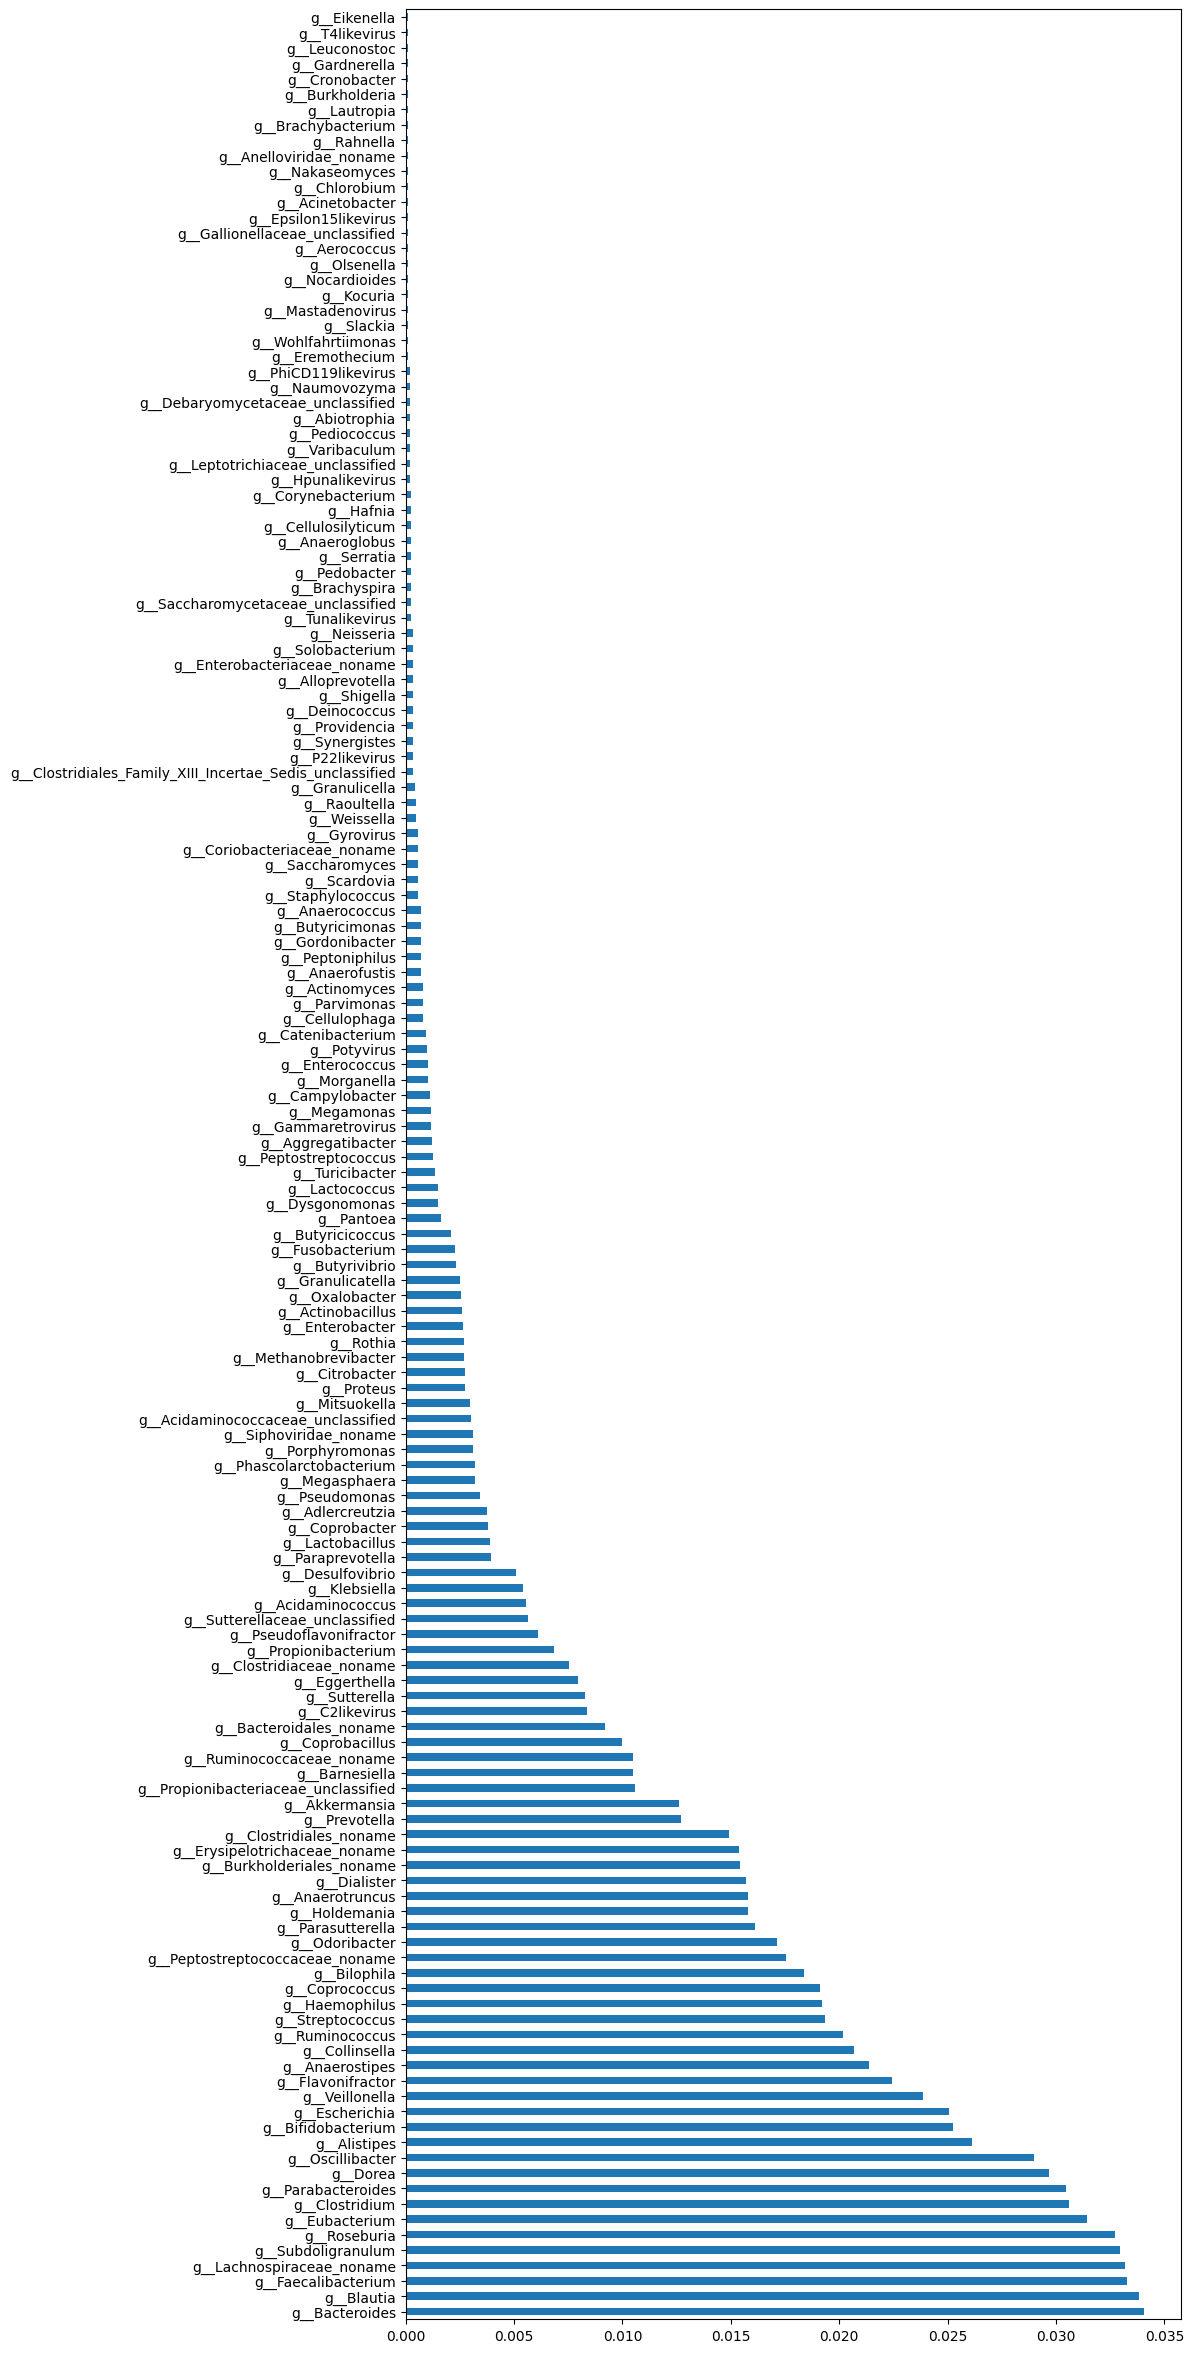

In [26]:
plt.figure(figsize=(10, 30))

importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.savefig('subject_tax.png')
plt.show()

In [27]:
y = master_tax['Age']
Xs = master_tax.drop(columns=['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Visit_ID', 'Sex', 'Age', 'Diagnosis', 'Race'])
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xs, y)

RandomForestClassifier(n_estimators=1000)

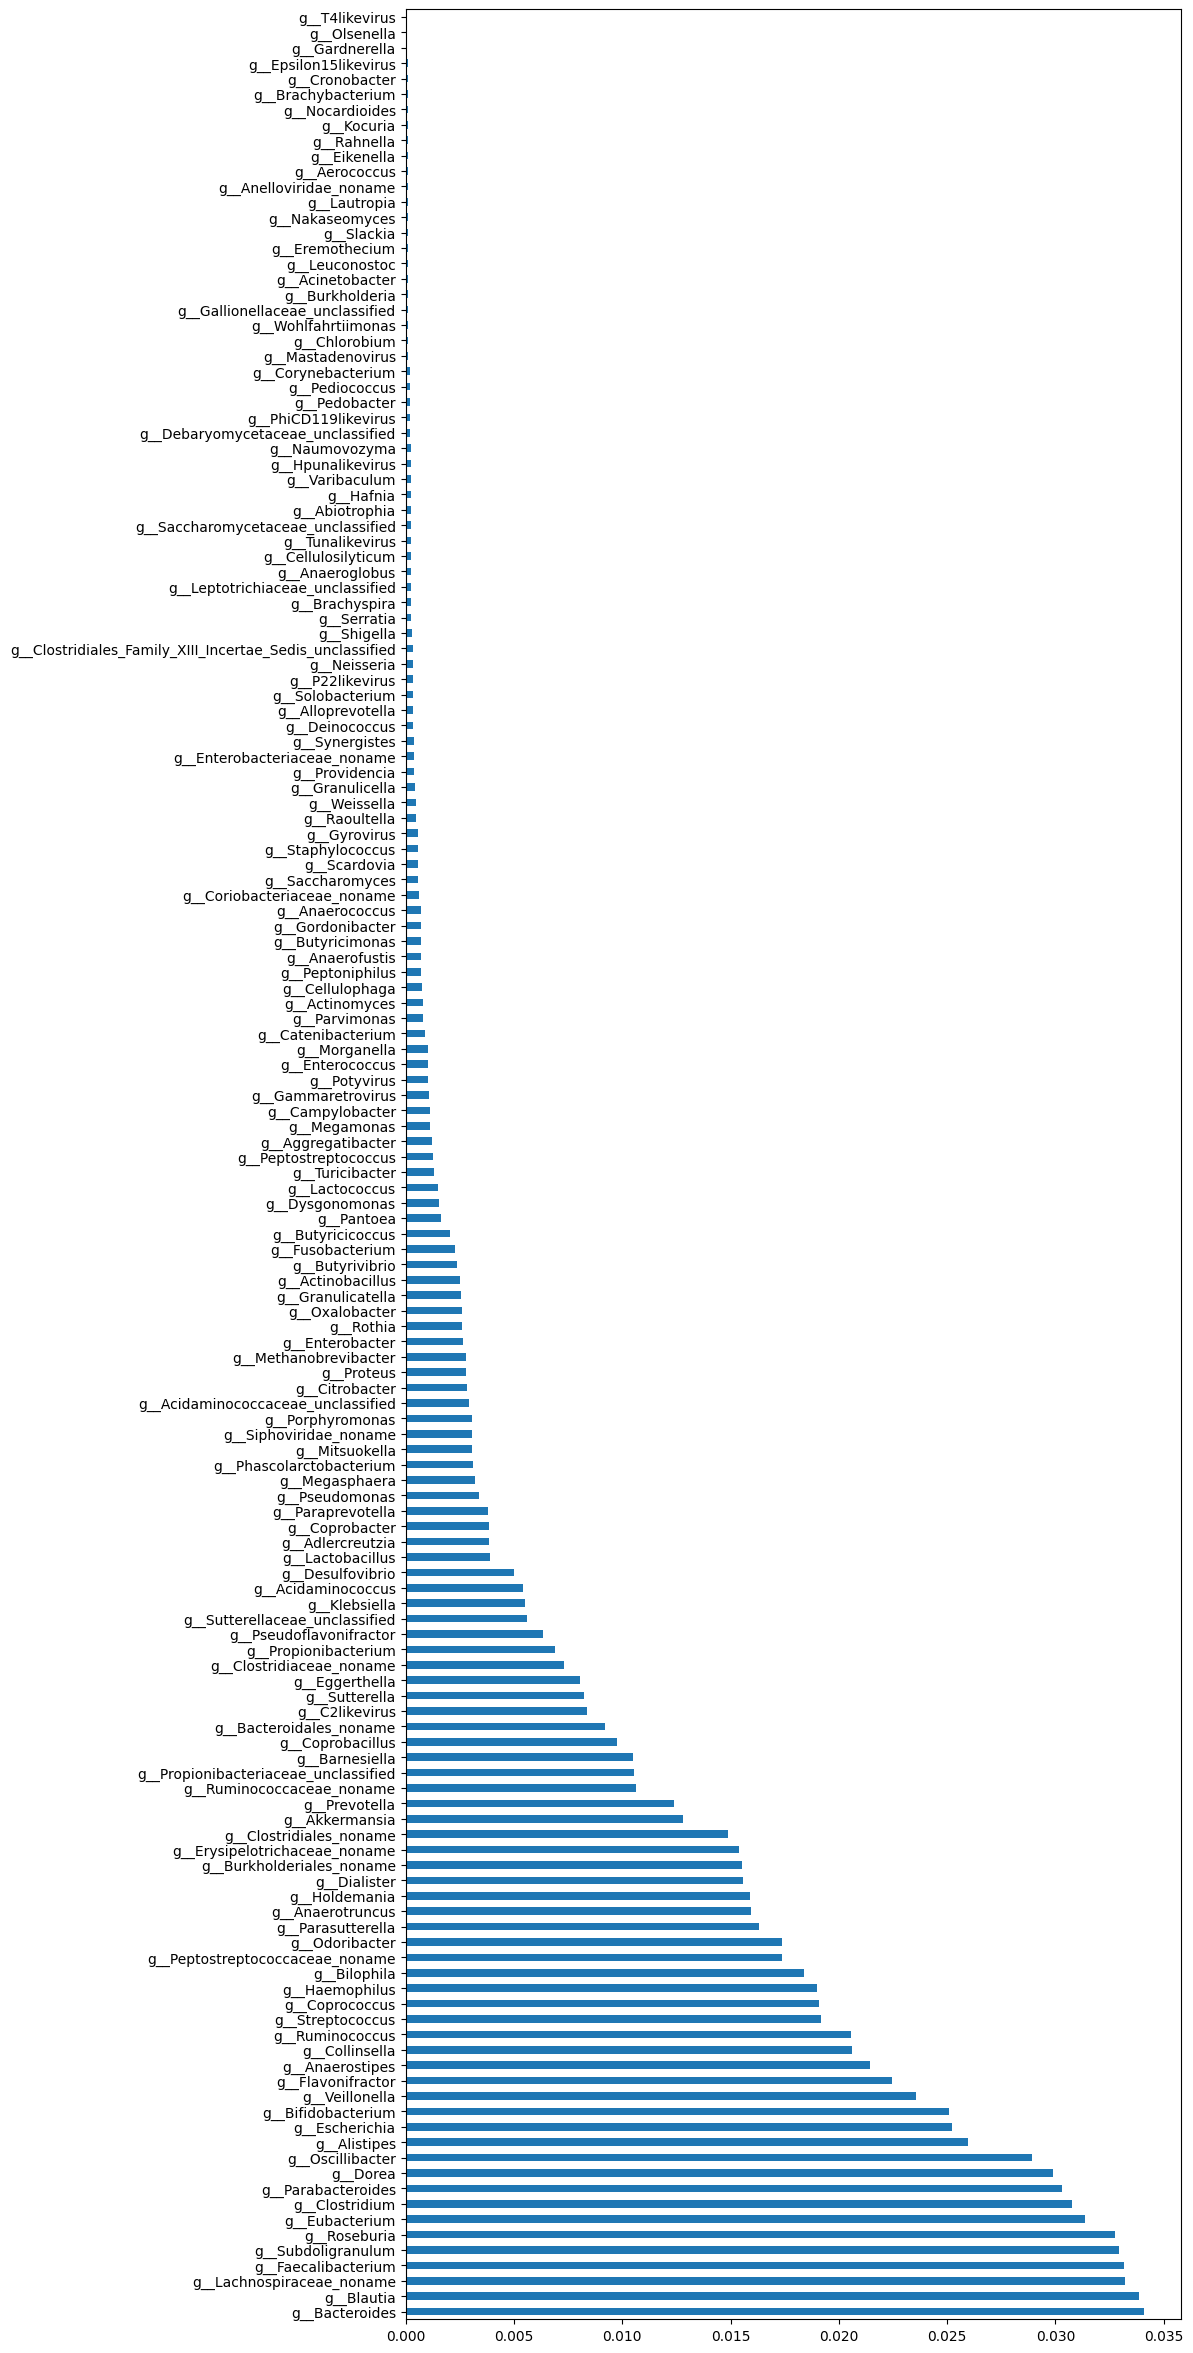

In [28]:
plt.figure(figsize=(10, 30))

importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.savefig('age_genus.png')
plt.show()

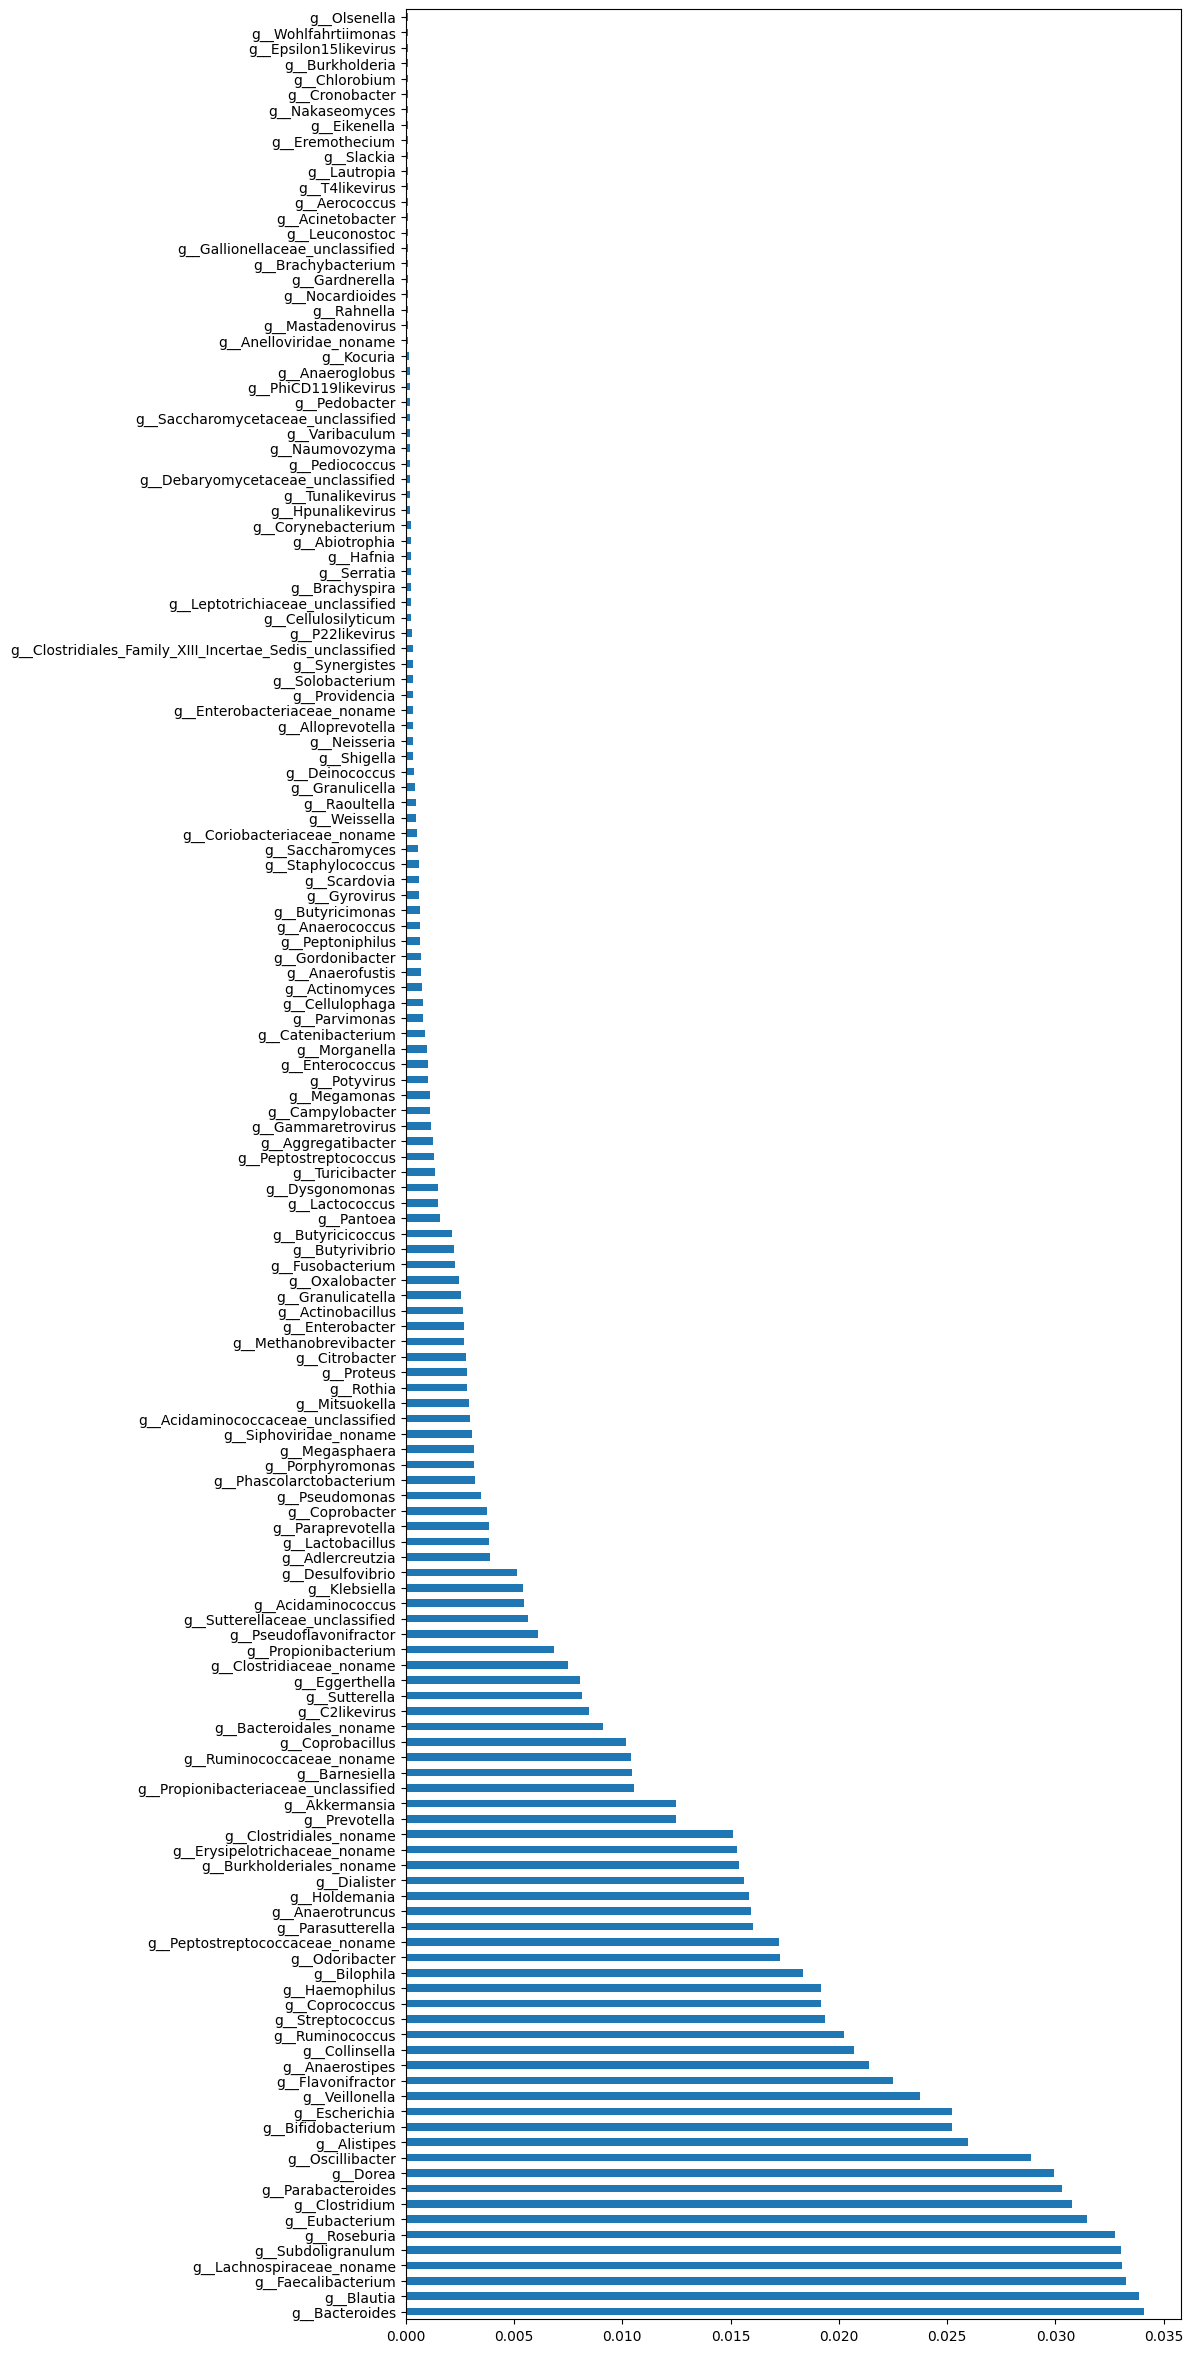

In [30]:
y = master_tax['Sex']
Xs = master_tax.drop(columns=['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Visit_ID', 'Sex', 'Age', 'Diagnosis', 'Race'])
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xs, y)

plt.figure(figsize=(10, 30))
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.savefig('sex_genus.png')
plt.show()

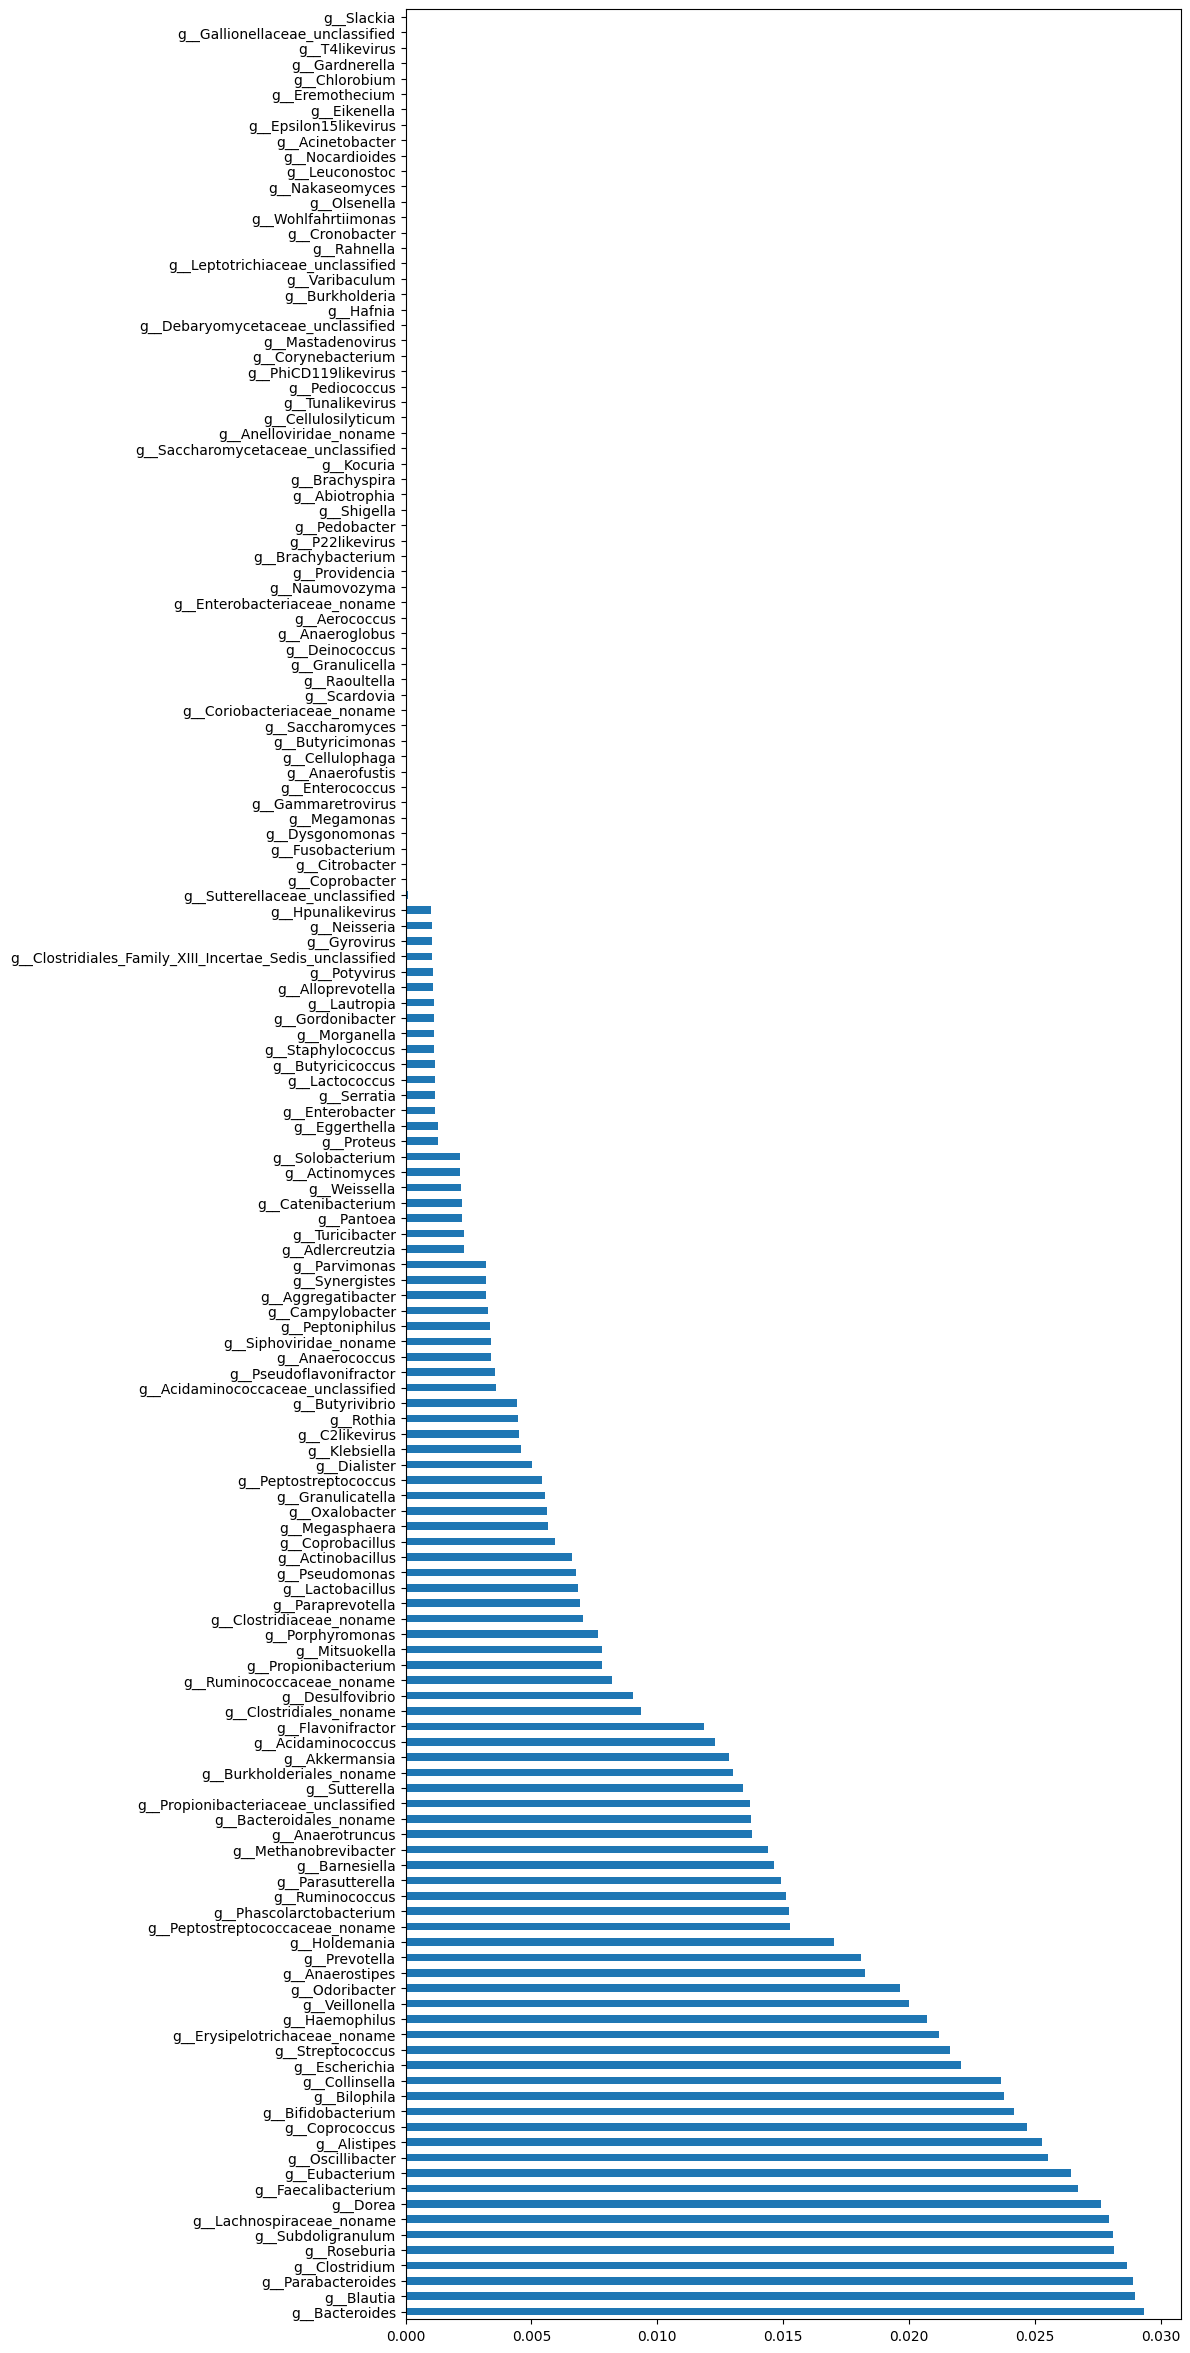

In [31]:
y = master_tax['Race']
Xs = master_tax.drop(columns=['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Visit_ID', 'Sex', 'Age', 'Diagnosis', 'Race'])
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xs, y)

plt.figure(figsize=(10, 30))
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.savefig('race_genus.png')
plt.show()

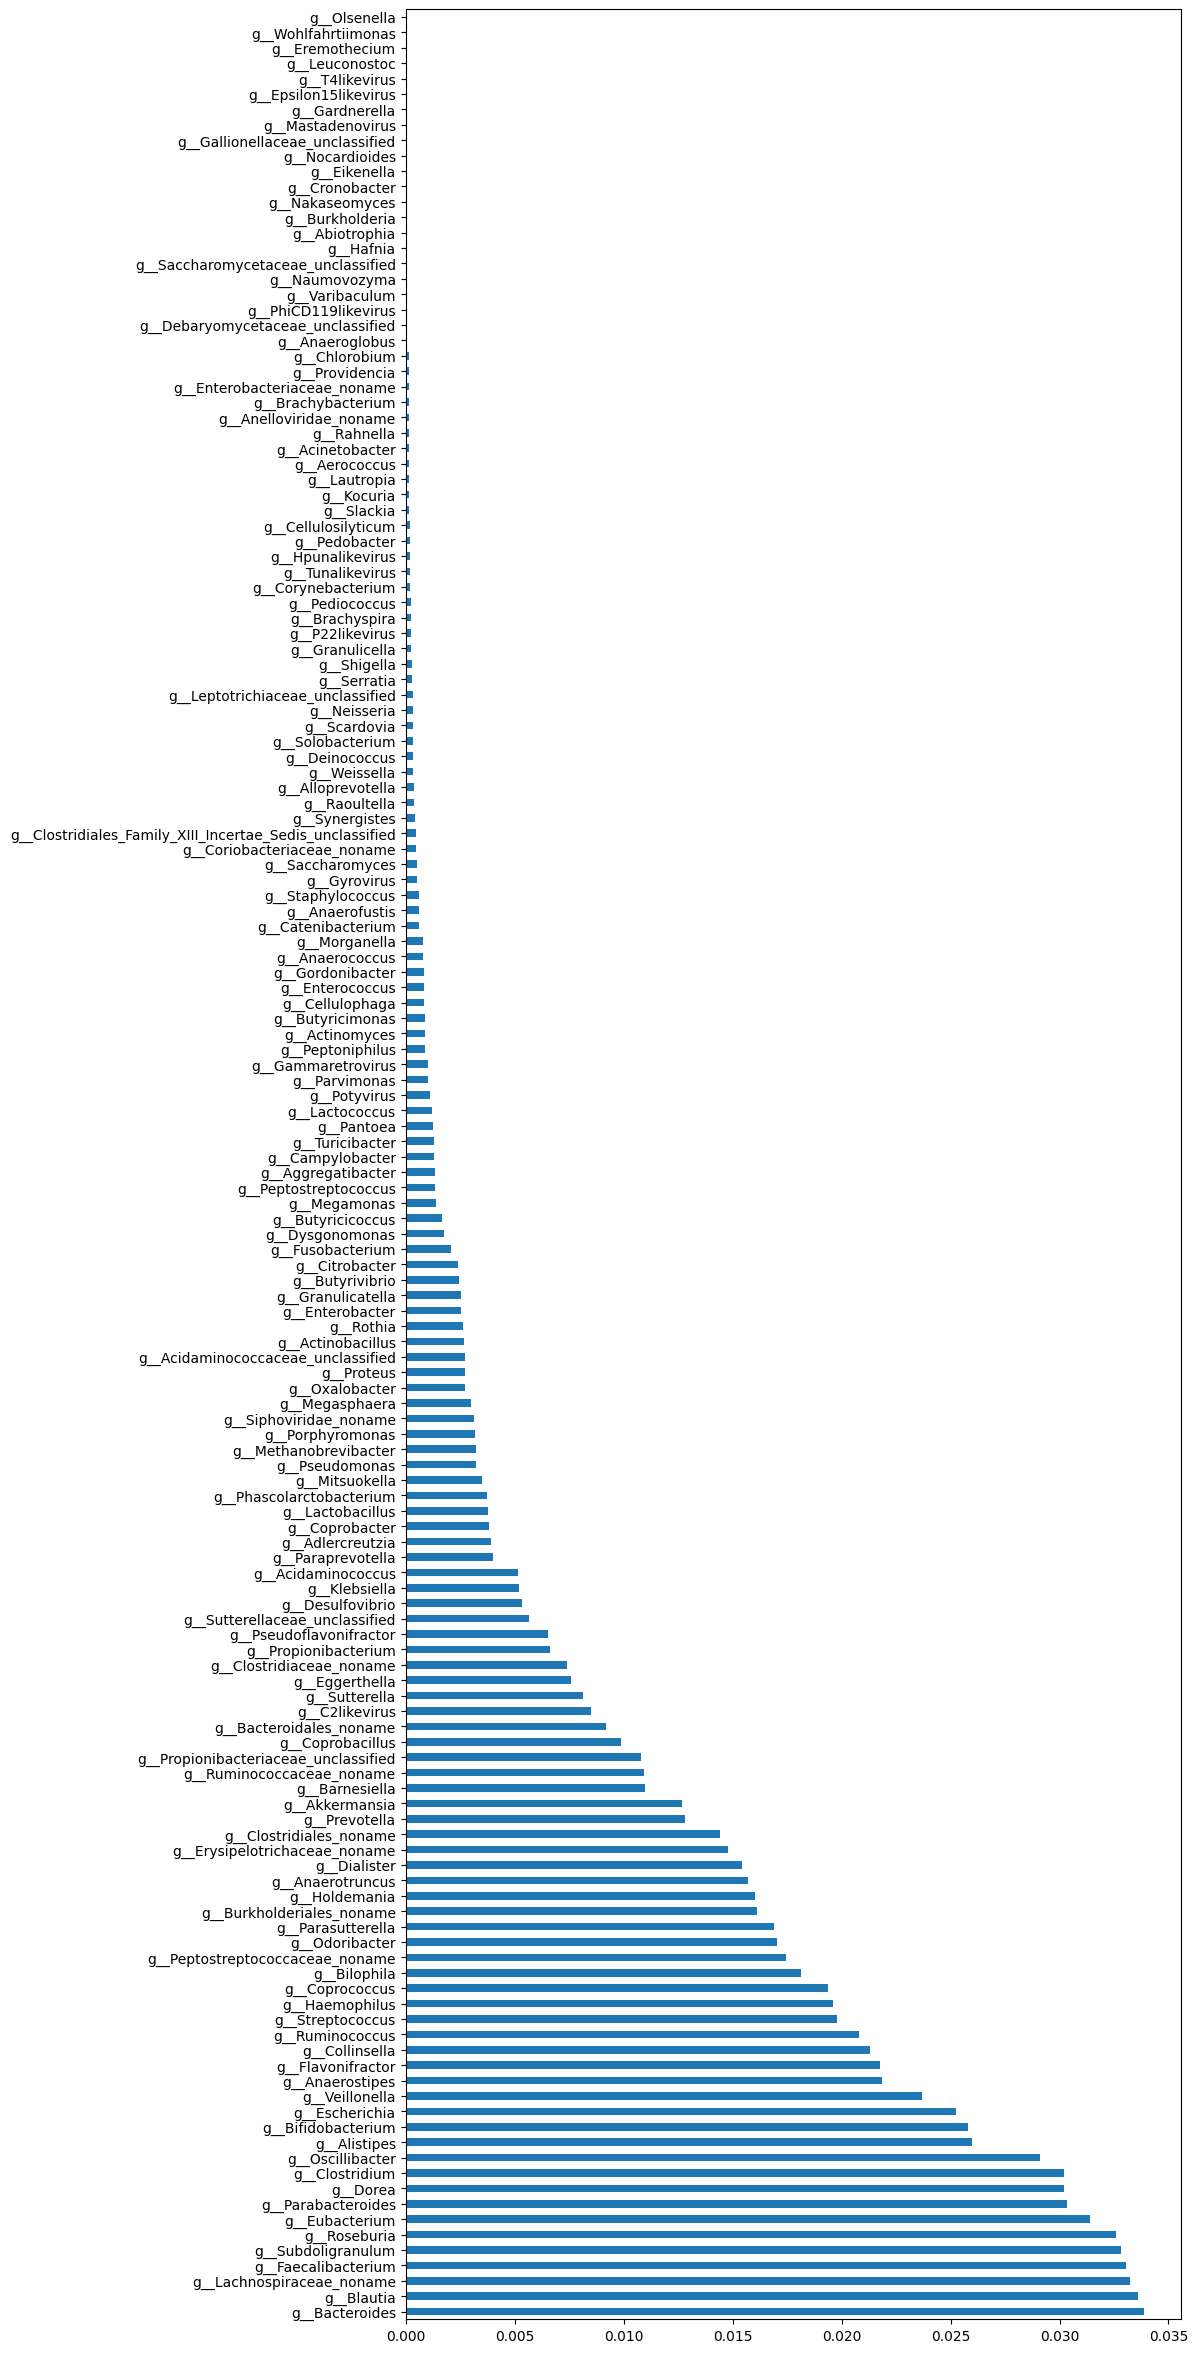

In [32]:
y = master_tax['Diagnosis']
Xs = master_tax.drop(columns=['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Visit_ID', 'Sex', 'Age', 'Diagnosis', 'Race'])
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xs, y)

plt.figure(figsize=(10, 30))
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.savefig('diagnosis_genus.png')
plt.show()

In [41]:
y = master_tax['Visit_ID']
Xs = master_tax.drop(columns=['Unnamed: 0', 'Subject_ID', 'Visit_number', 'Visit_ID', 'Sex', 'Age', 'Diagnosis', 'Race'])
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(Xs, y)

plt.figure(figsize=(10, 30))
importance_sr = pd.Series(rf.feature_importances_,index =Xs.columns)
importance_sr.sort_values(ascending=False).plot.barh()
plt.savefig('visit_genus.png')
plt.show()

KeyError: ('Subject_ID', 'Visit_ID')

In [34]:
importance_sr

g__Abiotrophia                        0.000221
g__Acidaminococcaceae_unclassified    0.002968
g__Acidaminococcus                    0.005518
g__Acinetobacter                      0.000117
g__Actinobacillus                     0.002646
                                        ...   
g__Turicibacter                       0.001375
g__Varibaculum                        0.000228
g__Veillonella                        0.023796
g__Weissella                          0.000463
g__Wohlfahrtiimonas                   0.000115
Length: 150, dtype: float64

In [40]:
importance_sr.sort_values(ascending=False)[:10]

g__Bacteroides               0.034073
g__Blautia                   0.033874
g__Faecalibacterium          0.033205
g__Subdoligranulum           0.033183
g__Lachnospiraceae_noname    0.033081
g__Roseburia                 0.032759
g__Eubacterium               0.031449
g__Clostridium               0.030690
g__Parabacteroides           0.030400
g__Dorea                     0.029684
dtype: float64